In [59]:
# 나중에 혹시 real 얼굴 데이터가 필요하면 이런 곳에서 가져올 수 있습니다.
# http://vis-www.cs.umass.edu/lfw/

In [60]:
import pickle
import os
import numpy as np

def make_pickle(filename, data) :
    with open('./pickle' + '/' + filename +'.pickle', 'wb') as f :
        pickle.dump(data, f)
    print('save successfully')
    
def unpickle(filename) :
    with open(filename, 'rb') as fo :
        data = pickle.load(fo, encoding = 'bytes')
    data = np.array(data) / 255.
    return data

In [61]:
import cv2

In [62]:
patch_image_path = 'C:/Users/user/Desktop/dataset/lfw'
# 한국어 있으면 안됨!

folder_list = os.listdir(patch_image_path)
li = []

for folder_name in folder_list :
    if '.ini' in str(folder_name) :
        break
    file_list = os.listdir(patch_image_path + '/' + folder_name)
    for file_name in file_list :
        img = cv2.imread(patch_image_path + '/' + folder_name + '/'+ file_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        li.append(img)

In [63]:
# make pickle
make_pickle('try', li)

save successfully


In [64]:
# unpickle
sample_imgs = unpickle('./pickle/try.pickle')

In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
img_path = './image/happy/tmpimage3.jpg'

(180, 320, 3)


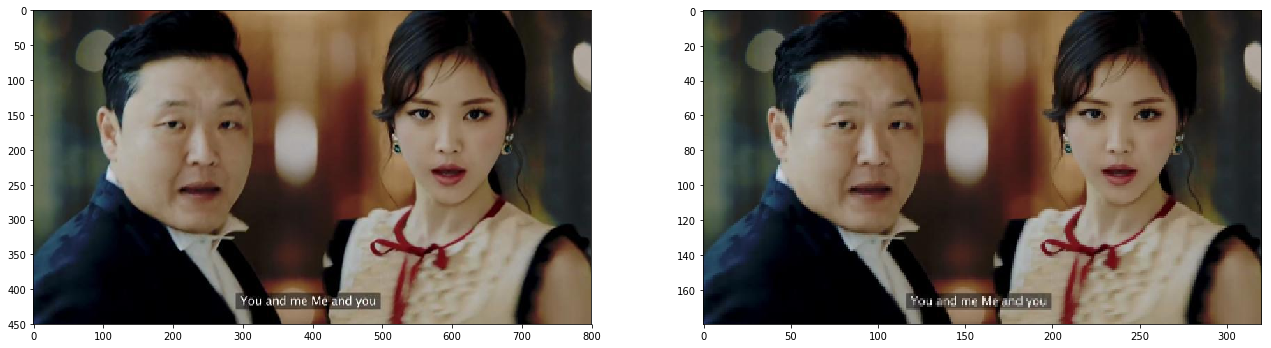

In [67]:
# read img
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plot original
fig = plt.figure(figsize = (22,10))
ax1 = plt.subplot(1,2,1)
ax1.imshow(img)

# plot changed
img = cv2.resize(img, dsize = None, fx = 0.4, fy = 0.4)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img)

# print changed shape
print(img.shape)

In [78]:
NUMBERS_OF_COLOR = 15

In [79]:
# changed image to 2D numpy array
h, w, d = img.shape
img_array = img.copy().astype(np.float) / 255
img_array = np.reshape(img_array, (w * h, d))
img_array.shape

(57600, 3)

In [80]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# all pixels
img_array_sample = shuffle(img_array, random_state = 0)
kmeans = KMeans(n_clusters = NUMBERS_OF_COLOR, random_state = 0).fit(img_array_sample)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

15


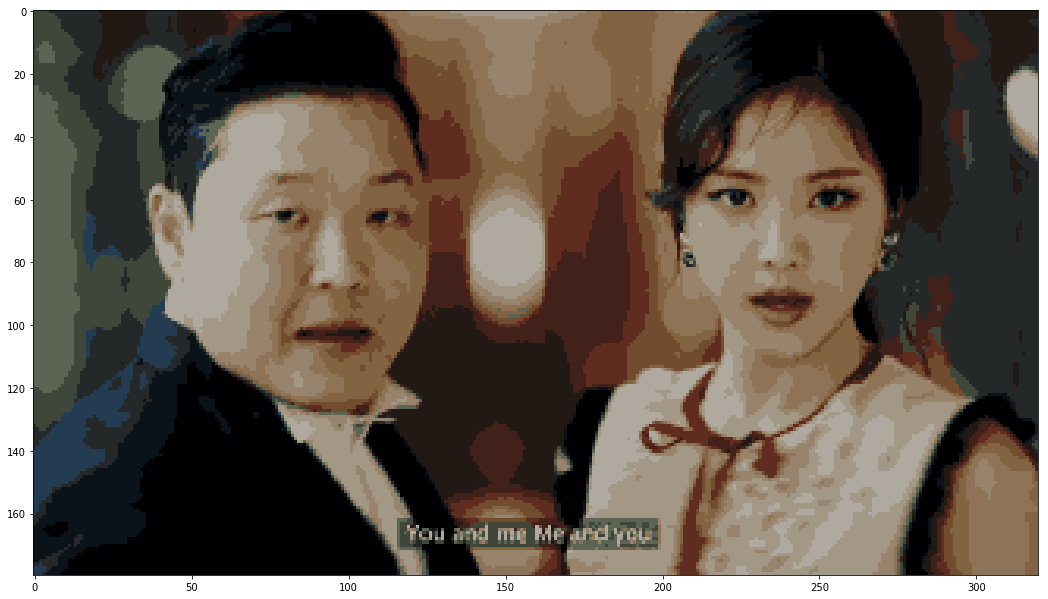

In [83]:
cluster_centers = kmeans.cluster_centers_
print(len(cluster_centers))
pred_labels = kmeans.predict(img_array)
cluster_labels = pred_labels.reshape((h, w))

img_quantized = np.zeros((h, w, d), dtype=np.float64)

label_idx = 0
for y in range(h):
    for x in range(w):
        label = pred_labels[label_idx]
        img_quantized[y, x] = cluster_centers[label]
        label_idx += 1

plt.figure(figsize=[18, 14])
plt.imshow(img_quantized)

2883
(250, 250, 3)
[[[0.00392157 0.2        0.47843137]
  [0.01568627 0.21176471 0.49019608]
  [0.00784314 0.21176471 0.50588235]
  ...
  [0.8627451  0.89411765 0.85098039]
  [0.89411765 0.89411765 0.84705882]
  [0.90588235 0.89803922 0.84705882]]

 [[0.00392157 0.2        0.47843137]
  [0.01568627 0.21176471 0.49019608]
  [0.00784314 0.21176471 0.50588235]
  ...
  [0.85490196 0.88235294 0.85098039]
  [0.89019608 0.89803922 0.85490196]
  [0.90588235 0.89803922 0.84705882]]

 [[0.00392157 0.2        0.47843137]
  [0.01568627 0.21176471 0.49019608]
  [0.00784314 0.21176471 0.50588235]
  ...
  [0.82745098 0.8627451  0.85098039]
  [0.88235294 0.89411765 0.85882353]
  [0.90196078 0.90196078 0.85490196]]

 ...

 [[0.2        0.14117647 0.21568627]
  [0.2        0.14117647 0.21568627]
  [0.20392157 0.14509804 0.21960784]
  ...
  [0.10588235 0.02745098 0.07058824]
  [0.12156863 0.04313725 0.07843137]
  [0.15686275 0.08235294 0.10588235]]

 [[0.2        0.14117647 0.21568627]
  [0.2        0.14

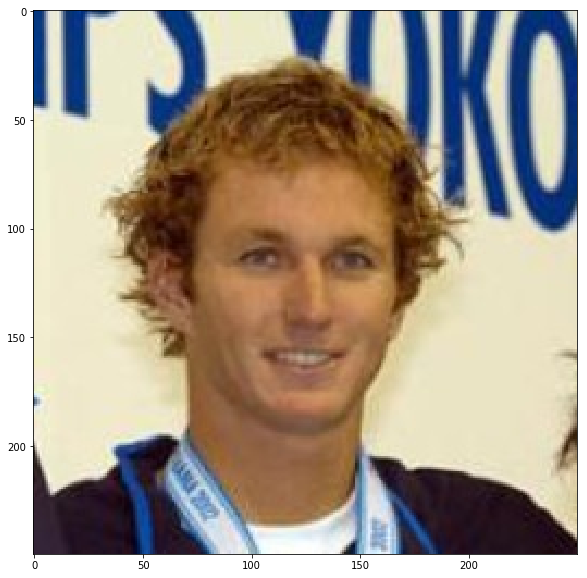

In [84]:
print(len(sample_imgs))
print(sample_imgs[1].shape)

plt.figure(figsize=[10,10])
plt.imshow(sample_imgs[4])
print(sample_imgs[4])

In [111]:
from collections import defaultdict
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances
from sklearn.utils import shuffle


DISTANCE_THRESHOLD = 0.4
bins = defaultdict(list)

dict_ = {}

for img_patch in sample_imgs :
    mean = np.mean(img_patch, axis = (0,1))
    distance = pairwise_distances(cluster_centers, [mean])
    for i in range(len(distance)) :
        dict_[i] = distance[i,0]
    
    # sorted list : 어떤 이름의 cluster center 과 가장 가까운지 반환한다.
    sorted_list = sorted(dict_.keys(), key=dict_.__getitem__)    
    print(sorted_list, end = ' ')
    
    j = 0
    while j < NUMBERS_OF_COLOR - 1 :
        if len(bins[sorted_list[j]]) == 0 :
            break
        elif len(bins[sorted_list[j]]) >= len(bins[sorted_list[j+1]]) :
            j+=1
        else :
            break
    print(sorted_list[j])
    bins[sorted_list[j]].append(img_patch)
    
            
    
#    cluster_index, distance = pairwise_distances_argmin_min(cluster_centers, [mean], axis = 0)   
#    if distance < DISTANCE_THRESHOLD :
#        bins[cluster_index[0]].append(img_patch)
        

# number of bins must equal to N_CLUSTERS. 
# if not, increase DISTANCE_THRESHOLD
print(len(bins))
print(NUMBERS_OF_COLOR)
assert(len(bins) == NUMBERS_OF_COLOR)

[5, 8, 13, 12, 3, 11, 6, 7, 0, 14, 1, 4, 9, 2, 10] 5
[12, 7, 1, 3, 9, 5, 13, 8, 2, 6, 11, 10, 0, 14, 4] 12
[9, 1, 2, 7, 12, 3, 10, 5, 13, 8, 6, 11, 0, 14, 4] 9
[10, 2, 9, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 10
[2, 9, 10, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 2
[12, 3, 5, 7, 13, 1, 8, 6, 11, 9, 0, 14, 2, 4, 10] 3
[1, 7, 9, 12, 3, 2, 5, 13, 10, 8, 6, 11, 0, 14, 4] 1
[13, 5, 3, 6, 11, 12, 8, 7, 0, 14, 1, 4, 9, 2, 10] 13
[2, 9, 10, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 7
[5, 13, 6, 3, 11, 8, 12, 0, 7, 14, 1, 4, 9, 2, 10] 6
[12, 7, 3, 1, 5, 13, 9, 8, 6, 11, 2, 0, 10, 14, 4] 8
[7, 1, 12, 3, 9, 5, 13, 2, 8, 6, 11, 10, 0, 14, 4] 11
[5, 11, 6, 8, 13, 0, 3, 12, 14, 7, 4, 1, 9, 2, 10] 0
[12, 7, 1, 3, 5, 9, 13, 8, 2, 6, 11, 0, 10, 14, 4] 14
[9, 2, 1, 12, 7, 10, 3, 5, 8, 13, 11, 6, 0, 14, 4] 4
[12, 3, 7, 5, 1, 13, 8, 6, 9, 11, 0, 2, 14, 10, 4] 4
[9, 1, 2, 12, 7, 10, 3, 5, 8, 13, 6, 11, 0, 14, 4] 14
[9, 2, 1, 7, 10, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 0
[5, 8, 13, 6, 3, 11, 12, 0, 7, 14, 1, 4,

[12, 7, 3, 1, 5, 9, 13, 8, 6, 11, 2, 0, 10, 14, 4] 1
[12, 5, 3, 7, 13, 8, 1, 6, 11, 9, 0, 14, 2, 4, 10] 8
[12, 5, 3, 7, 8, 13, 1, 6, 11, 9, 0, 14, 2, 4, 10] 13
[10, 2, 9, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 14
[9, 2, 1, 10, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 0
[1, 9, 7, 12, 2, 3, 5, 10, 13, 8, 6, 11, 0, 14, 4] 4
[10, 2, 9, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 14
[1, 7, 9, 12, 3, 2, 5, 13, 10, 8, 6, 11, 0, 14, 4] 0
[12, 3, 7, 5, 1, 13, 8, 9, 6, 11, 0, 2, 14, 10, 4] 11
[2, 10, 9, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 6
[9, 2, 1, 7, 10, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 8
[5, 6, 13, 11, 3, 0, 8, 12, 14, 7, 4, 1, 9, 2, 10] 5
[5, 6, 11, 13, 0, 8, 3, 14, 12, 7, 4, 1, 9, 2, 10] 13
[3, 13, 5, 6, 12, 7, 11, 8, 0, 1, 14, 9, 4, 2, 10] 3
[12, 1, 7, 9, 3, 5, 2, 8, 13, 6, 10, 11, 0, 14, 4] 9
[1, 9, 12, 7, 2, 3, 5, 10, 8, 13, 6, 11, 0, 14, 4] 1
[10, 2, 9, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 2
[5, 6, 13, 11, 8, 3, 0, 12, 14, 7, 4, 1, 9, 2, 10] 12
[9, 2, 1, 10, 7, 12, 3, 5, 13, 8, 6, 11,

[3, 7, 13, 1, 12, 5, 9, 6, 8, 11, 0, 2, 14, 10, 4] 13
[12, 7, 3, 5, 1, 13, 8, 9, 6, 11, 2, 0, 14, 10, 4] 6
[5, 6, 11, 13, 8, 0, 3, 12, 14, 7, 4, 1, 9, 2, 10] 0
[5, 3, 13, 12, 6, 8, 11, 7, 0, 1, 14, 9, 4, 2, 10] 4
[7, 3, 1, 12, 9, 5, 13, 2, 6, 8, 11, 0, 10, 14, 4] 4
[9, 2, 1, 10, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 14
[2, 9, 10, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 0
[1, 12, 9, 7, 2, 3, 5, 10, 8, 13, 6, 11, 0, 14, 4] 11
[12, 5, 3, 7, 13, 8, 1, 6, 11, 9, 0, 14, 2, 4, 10] 6
[12, 1, 7, 9, 3, 2, 5, 8, 13, 10, 6, 11, 0, 14, 4] 10
[5, 6, 13, 11, 8, 3, 0, 12, 14, 7, 4, 1, 9, 2, 10] 5
[12, 7, 3, 5, 1, 13, 8, 9, 6, 11, 2, 0, 14, 10, 4] 3
[5, 12, 8, 3, 13, 6, 11, 7, 0, 1, 14, 9, 4, 2, 10] 8
[12, 1, 7, 9, 3, 5, 2, 13, 8, 10, 6, 11, 0, 14, 4] 9
[12, 5, 8, 3, 7, 13, 11, 6, 1, 0, 9, 14, 2, 4, 10] 12
[7, 3, 1, 12, 13, 9, 5, 6, 2, 8, 11, 0, 10, 14, 4] 7
[12, 1, 9, 7, 2, 3, 5, 8, 13, 10, 6, 11, 0, 14, 4] 1
[12, 5, 3, 7, 13, 1, 8, 6, 11, 9, 0, 14, 2, 4, 10] 13
[2, 9, 10, 1, 7, 12, 3, 5, 8, 13, 6, 11,

[12, 7, 3, 1, 5, 13, 9, 8, 6, 11, 2, 0, 10, 14, 4] 11
[7, 1, 12, 3, 9, 5, 13, 2, 8, 6, 11, 10, 0, 14, 4] 13
[5, 13, 3, 6, 12, 11, 8, 7, 0, 1, 14, 9, 4, 2, 10] 5
[12, 1, 7, 9, 5, 3, 8, 2, 13, 11, 6, 10, 0, 14, 4] 9
[1, 9, 7, 2, 12, 3, 10, 5, 13, 8, 6, 11, 0, 14, 4] 1
[7, 1, 12, 3, 9, 5, 13, 2, 8, 6, 11, 10, 0, 14, 4] 7
[1, 9, 7, 12, 2, 3, 10, 5, 13, 8, 6, 11, 0, 14, 4] 12
[9, 1, 2, 12, 7, 10, 3, 5, 8, 13, 6, 11, 0, 14, 4] 3
[1, 7, 9, 12, 3, 2, 5, 13, 10, 8, 6, 11, 0, 14, 4] 6
[9, 2, 1, 10, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 8
[1, 12, 7, 9, 3, 2, 5, 13, 8, 10, 6, 11, 0, 14, 4] 4
[9, 2, 1, 7, 10, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 14
[12, 7, 5, 3, 1, 8, 13, 9, 6, 11, 2, 0, 14, 10, 4] 4
[2, 9, 10, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 14
[1, 9, 7, 12, 2, 3, 10, 5, 13, 8, 6, 11, 0, 14, 4] 0
[2, 9, 10, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 11
[2, 10, 9, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 6
[5, 3, 13, 12, 6, 7, 8, 11, 0, 1, 14, 9, 4, 2, 10] 12
[12, 5, 3, 7, 8, 13, 1, 6, 11, 9, 0, 14

[9, 1, 2, 7, 12, 10, 3, 5, 13, 8, 6, 11, 0, 14, 4] 2
[7, 1, 12, 9, 3, 5, 2, 13, 8, 6, 10, 11, 0, 14, 4] 13
[2, 9, 1, 10, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 10
[5, 12, 3, 8, 13, 7, 6, 11, 1, 0, 14, 9, 4, 2, 10] 10
[5, 3, 13, 12, 6, 7, 8, 11, 0, 1, 14, 9, 4, 2, 10] 2
[9, 1, 7, 2, 12, 3, 10, 5, 13, 8, 6, 11, 0, 14, 4] 7
[2, 10, 9, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 1
[12, 5, 3, 7, 1, 13, 8, 6, 9, 11, 0, 2, 14, 10, 4] 3
[1, 9, 7, 12, 2, 3, 5, 10, 13, 8, 6, 11, 0, 14, 4] 9
[10, 2, 9, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 12
[2, 10, 9, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 4
[9, 1, 7, 2, 12, 3, 10, 5, 13, 8, 6, 11, 0, 14, 4] 14
[9, 1, 2, 12, 7, 10, 3, 5, 8, 13, 6, 11, 0, 14, 4] 0
[2, 10, 9, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 11
[9, 1, 2, 7, 12, 10, 3, 5, 13, 8, 6, 11, 0, 14, 4] 6
[12, 1, 9, 7, 2, 3, 5, 8, 10, 13, 6, 11, 0, 14, 4] 8
[12, 7, 1, 3, 9, 5, 13, 2, 8, 6, 11, 10, 0, 14, 4] 13
[11, 5, 6, 8, 0, 13, 14, 3, 12, 4, 7, 1, 9, 2, 10] 5
[6, 11, 0, 13, 5, 14, 8, 3, 4, 12, 7, 1

[2, 9, 10, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 9
[9, 2, 1, 10, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 1
[1, 7, 9, 12, 3, 2, 5, 13, 10, 8, 6, 11, 0, 14, 4] 13
[9, 2, 1, 10, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 2
[2, 10, 9, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 5
[2, 10, 9, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 3
[5, 13, 3, 6, 12, 11, 8, 7, 0, 14, 1, 4, 9, 2, 10] 12
[3, 5, 13, 12, 6, 7, 8, 11, 0, 1, 14, 9, 4, 2, 10] 0
[9, 1, 2, 7, 12, 10, 3, 5, 13, 8, 6, 11, 0, 14, 4] 4
[3, 12, 5, 7, 13, 8, 6, 1, 11, 0, 9, 14, 2, 4, 10] 14
[7, 3, 12, 1, 5, 13, 9, 6, 8, 11, 2, 0, 14, 10, 4] 4
[9, 1, 2, 12, 7, 10, 3, 5, 8, 13, 6, 11, 0, 14, 4] 14
[1, 12, 7, 9, 3, 2, 5, 13, 8, 10, 6, 11, 0, 14, 4] 0
[9, 12, 2, 1, 7, 10, 5, 3, 8, 13, 11, 6, 0, 14, 4] 6
[2, 9, 10, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 8
[12, 7, 1, 3, 9, 5, 13, 8, 2, 6, 11, 10, 0, 14, 4] 13
[7, 1, 9, 12, 3, 2, 5, 13, 10, 8, 6, 11, 0, 14, 4] 5
[9, 2, 1, 10, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 3
[2, 9, 10, 1, 7, 12, 3, 5, 13, 8, 6, 11, 

[12, 1, 7, 9, 3, 5, 2, 8, 13, 10, 6, 11, 0, 14, 4] 12
[12, 7, 1, 3, 5, 9, 8, 13, 6, 2, 11, 0, 10, 14, 4] 5
[3, 5, 13, 12, 6, 7, 8, 11, 1, 0, 14, 9, 4, 2, 10] 13
[12, 3, 7, 5, 13, 1, 8, 6, 9, 11, 0, 2, 14, 4, 10] 6
[3, 5, 12, 13, 7, 6, 1, 8, 11, 0, 9, 14, 2, 4, 10] 11
[5, 13, 6, 11, 3, 8, 0, 12, 7, 14, 1, 4, 9, 2, 10] 14
[9, 1, 2, 7, 12, 10, 3, 5, 13, 8, 6, 11, 0, 14, 4] 4
[2, 9, 10, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 4
[12, 7, 1, 3, 5, 9, 13, 8, 2, 6, 11, 0, 10, 14, 4] 14
[5, 6, 13, 11, 3, 0, 8, 12, 14, 7, 4, 1, 9, 2, 10] 12
[12, 7, 1, 9, 3, 5, 2, 13, 8, 6, 10, 11, 0, 14, 4] 0
[9, 1, 2, 12, 7, 10, 3, 5, 8, 13, 6, 11, 0, 14, 4] 2
[5, 13, 6, 3, 11, 8, 12, 0, 7, 14, 1, 4, 9, 2, 10] 8
[5, 12, 3, 7, 13, 8, 6, 11, 1, 0, 9, 14, 2, 4, 10] 5
[3, 13, 7, 1, 12, 6, 5, 9, 11, 0, 8, 2, 14, 4, 10] 1
[12, 7, 1, 3, 9, 5, 13, 8, 2, 6, 11, 10, 0, 14, 4] 7
[2, 10, 9, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 9
[12, 9, 1, 7, 2, 3, 5, 8, 10, 13, 11, 6, 0, 14, 4] 3
[1, 9, 12, 7, 2, 3, 5, 10, 8, 13, 6, 11,

[13, 5, 6, 3, 11, 0, 12, 8, 7, 14, 1, 4, 9, 2, 10] 14
[12, 5, 3, 7, 8, 1, 13, 6, 11, 9, 0, 2, 14, 10, 4] 4
[7, 12, 1, 3, 9, 5, 2, 13, 8, 6, 11, 10, 0, 14, 4] 14
[5, 13, 6, 11, 8, 3, 12, 0, 7, 14, 1, 4, 9, 2, 10] 7
[12, 3, 5, 7, 13, 1, 8, 6, 11, 9, 0, 14, 2, 4, 10] 5
[5, 13, 3, 6, 11, 8, 12, 0, 7, 14, 1, 4, 9, 2, 10] 0
[5, 12, 3, 13, 7, 8, 6, 11, 1, 0, 9, 14, 4, 2, 10] 13
[3, 7, 12, 5, 13, 1, 6, 8, 11, 9, 0, 2, 14, 4, 10] 3
[3, 5, 12, 13, 7, 6, 8, 11, 1, 0, 9, 14, 2, 4, 10] 12
[5, 12, 3, 13, 8, 6, 7, 11, 0, 1, 14, 9, 4, 2, 10] 6
[9, 2, 1, 12, 7, 10, 3, 5, 8, 13, 6, 11, 0, 14, 4] 1
[12, 7, 3, 1, 5, 13, 9, 8, 6, 11, 2, 0, 14, 10, 4] 8
[12, 1, 7, 9, 3, 2, 5, 8, 13, 10, 6, 11, 0, 14, 4] 9
[7, 12, 1, 3, 9, 5, 13, 8, 2, 6, 11, 10, 0, 14, 4] 2
[12, 5, 3, 7, 1, 13, 8, 6, 11, 9, 0, 2, 14, 4, 10] 11
[13, 3, 6, 5, 11, 7, 12, 0, 8, 1, 14, 4, 9, 2, 10] 10
[12, 7, 3, 1, 5, 9, 13, 8, 6, 11, 2, 0, 10, 14, 4] 4
[5, 6, 11, 13, 8, 3, 0, 12, 14, 7, 4, 1, 9, 2, 10] 7
[12, 7, 3, 1, 5, 13, 9, 8, 6, 11, 2, 0, 

[12, 7, 1, 3, 5, 9, 8, 13, 2, 6, 11, 10, 0, 14, 4] 4
[1, 7, 12, 9, 3, 5, 2, 13, 8, 10, 6, 11, 0, 14, 4] 14
[12, 7, 3, 5, 1, 13, 9, 8, 6, 11, 2, 0, 14, 10, 4] 0
[3, 13, 5, 7, 12, 6, 11, 1, 8, 0, 9, 14, 4, 2, 10] 8
[1, 9, 7, 12, 2, 3, 5, 10, 13, 8, 6, 11, 0, 14, 4] 13
[9, 1, 2, 7, 12, 10, 3, 5, 13, 8, 6, 11, 0, 14, 4] 5
[5, 12, 8, 3, 7, 13, 11, 6, 1, 0, 9, 14, 2, 4, 10] 12
[8, 11, 5, 14, 0, 6, 4, 13, 12, 3, 7, 1, 9, 2, 10] 11
[13, 3, 5, 6, 7, 12, 11, 8, 0, 1, 14, 9, 4, 2, 10] 3
[12, 7, 3, 1, 5, 9, 13, 8, 6, 11, 2, 0, 10, 14, 4] 7
[12, 7, 3, 5, 1, 13, 8, 9, 6, 11, 2, 0, 14, 10, 4] 1
[3, 7, 12, 1, 13, 5, 9, 6, 8, 11, 2, 0, 14, 10, 4] 6
[12, 1, 9, 7, 2, 3, 5, 8, 10, 13, 6, 11, 0, 14, 4] 9
[12, 1, 7, 9, 3, 2, 5, 13, 8, 10, 6, 11, 0, 14, 4] 2
[9, 1, 2, 7, 12, 10, 3, 5, 13, 8, 6, 11, 0, 14, 4] 10
[1, 7, 12, 9, 3, 2, 5, 13, 8, 10, 6, 11, 0, 14, 4] 4
[2, 9, 10, 1, 12, 7, 3, 5, 8, 13, 6, 11, 0, 14, 4] 14
[9, 1, 2, 12, 7, 10, 3, 5, 8, 13, 6, 11, 0, 14, 4] 0
[5, 13, 8, 6, 3, 11, 12, 0, 7, 14, 1, 4,

[3, 5, 12, 13, 7, 6, 8, 11, 1, 0, 9, 14, 2, 4, 10] 8
[9, 1, 12, 2, 7, 10, 3, 5, 8, 13, 6, 11, 0, 14, 4] 10
[12, 9, 1, 7, 2, 5, 3, 8, 10, 13, 11, 6, 0, 14, 4] 6
[1, 9, 7, 12, 3, 2, 5, 13, 10, 8, 6, 11, 0, 14, 4] 4
[10, 2, 9, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 14
[5, 6, 13, 8, 11, 3, 12, 0, 7, 14, 1, 4, 9, 2, 10] 7
[5, 3, 13, 12, 7, 6, 8, 11, 1, 0, 14, 9, 4, 2, 10] 12
[12, 7, 3, 5, 1, 8, 13, 9, 6, 11, 2, 0, 14, 10, 4] 0
[12, 7, 3, 1, 5, 13, 9, 8, 6, 11, 2, 0, 14, 10, 4] 2
[5, 13, 6, 11, 3, 8, 12, 0, 7, 14, 1, 4, 9, 2, 10] 8
[9, 1, 12, 7, 2, 3, 10, 5, 8, 13, 6, 11, 0, 14, 4] 1
[12, 7, 1, 3, 9, 5, 13, 2, 8, 6, 11, 10, 0, 14, 4] 13
[5, 11, 8, 6, 13, 3, 12, 0, 14, 7, 1, 4, 9, 2, 10] 11
[2, 9, 1, 10, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 9
[1, 9, 7, 12, 2, 3, 10, 5, 13, 8, 6, 11, 0, 14, 4] 5
[1, 7, 9, 12, 3, 2, 5, 13, 10, 8, 6, 11, 0, 14, 4] 3
[3, 7, 12, 5, 1, 13, 9, 6, 8, 11, 0, 2, 14, 10, 4] 6
[2, 9, 10, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 10
[1, 9, 7, 12, 2, 3, 5, 10, 13, 8, 6, 11,

[5, 3, 13, 12, 6, 7, 8, 11, 0, 1, 14, 9, 4, 2, 10] 5
[12, 7, 1, 3, 5, 9, 13, 8, 2, 6, 11, 0, 10, 14, 4] 1
[1, 9, 12, 7, 2, 3, 5, 10, 13, 8, 6, 11, 0, 14, 4] 9
[10, 2, 9, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 2
[12, 1, 7, 9, 5, 3, 8, 2, 13, 10, 11, 6, 0, 14, 4] 8
[2, 9, 10, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 10
[9, 1, 2, 7, 12, 10, 3, 5, 13, 8, 6, 11, 0, 14, 4] 11
[2, 9, 10, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 6
[9, 1, 2, 7, 12, 10, 3, 5, 13, 8, 6, 11, 0, 14, 4] 4
[7, 1, 9, 3, 12, 2, 13, 5, 6, 8, 10, 11, 0, 14, 4] 14
[12, 7, 1, 3, 9, 5, 8, 13, 2, 6, 11, 10, 0, 14, 4] 0
[12, 7, 1, 3, 5, 9, 8, 13, 2, 6, 11, 10, 0, 14, 4] 10
[7, 12, 1, 3, 9, 5, 13, 2, 8, 6, 11, 10, 0, 14, 4] 11
[3, 5, 12, 7, 13, 8, 6, 1, 11, 0, 9, 14, 2, 4, 10] 1
[12, 3, 7, 5, 1, 13, 8, 9, 6, 11, 0, 2, 14, 10, 4] 5
[12, 7, 3, 5, 1, 13, 8, 9, 6, 11, 2, 0, 14, 10, 4] 3
[3, 12, 5, 7, 13, 8, 6, 1, 11, 0, 9, 14, 2, 4, 10] 12
[12, 3, 7, 5, 1, 13, 8, 9, 6, 11, 0, 2, 14, 10, 4] 7
[7, 12, 1, 3, 9, 5, 13, 8, 2, 6, 11, 0, 

[7, 1, 12, 9, 3, 2, 5, 13, 8, 10, 6, 11, 0, 14, 4] 10
[2, 9, 1, 10, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 1
[9, 1, 7, 2, 12, 3, 10, 5, 13, 8, 6, 11, 0, 14, 4] 9
[3, 13, 5, 7, 12, 6, 1, 8, 11, 0, 9, 14, 2, 4, 10] 12
[2, 9, 1, 10, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 2
[1, 9, 7, 12, 2, 3, 10, 5, 13, 8, 6, 11, 0, 14, 4] 7
[12, 3, 7, 5, 1, 13, 8, 6, 9, 11, 0, 2, 14, 10, 4] 3
[5, 13, 3, 8, 6, 12, 11, 7, 0, 14, 1, 4, 9, 2, 10] 13
[12, 1, 7, 9, 3, 5, 2, 13, 8, 10, 6, 11, 0, 14, 4] 5
[2, 9, 10, 1, 12, 7, 3, 5, 8, 13, 6, 11, 0, 14, 4] 8
[12, 5, 3, 7, 8, 13, 1, 6, 11, 9, 0, 2, 14, 4, 10] 10
[9, 1, 2, 7, 12, 10, 3, 5, 8, 13, 6, 11, 0, 14, 4] 12
[12, 1, 7, 9, 3, 5, 2, 8, 13, 10, 6, 11, 0, 14, 4] 13
[3, 7, 12, 5, 13, 1, 6, 8, 9, 11, 0, 2, 14, 10, 4] 7
[12, 3, 7, 5, 1, 13, 8, 9, 6, 11, 0, 2, 14, 10, 4] 3
[3, 12, 7, 5, 13, 1, 6, 8, 11, 9, 0, 2, 14, 4, 10] 5
[12, 7, 1, 3, 9, 5, 13, 8, 2, 6, 11, 0, 10, 14, 4] 1
[12, 5, 3, 7, 8, 13, 1, 6, 11, 9, 0, 14, 2, 4, 10] 8
[9, 1, 2, 7, 12, 10, 3, 5, 13, 8, 6, 11,

[9, 1, 2, 7, 10, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 9
[9, 1, 2, 7, 12, 10, 3, 5, 13, 8, 6, 11, 0, 14, 4] 12
[6, 13, 5, 11, 0, 3, 8, 14, 12, 7, 4, 1, 9, 2, 10] 13
[12, 7, 3, 5, 1, 13, 8, 9, 6, 11, 2, 0, 14, 10, 4] 11
[3, 7, 12, 13, 5, 1, 6, 8, 11, 9, 0, 14, 2, 4, 10] 0
[5, 8, 11, 12, 13, 6, 3, 0, 7, 14, 1, 4, 9, 2, 10] 10
[2, 10, 9, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 2
[12, 7, 1, 3, 9, 5, 13, 8, 2, 6, 11, 10, 0, 14, 4] 8
[6, 5, 11, 13, 0, 8, 3, 14, 12, 7, 4, 1, 9, 2, 10] 0
[1, 7, 9, 12, 3, 2, 5, 13, 10, 8, 6, 11, 0, 14, 4] 3
[9, 1, 2, 12, 7, 10, 3, 5, 8, 13, 6, 11, 0, 14, 4] 1
[9, 1, 2, 7, 12, 10, 3, 5, 13, 8, 6, 11, 0, 14, 4] 9
[1, 12, 7, 9, 3, 2, 5, 13, 8, 10, 6, 11, 0, 14, 4] 7
[5, 13, 6, 11, 3, 8, 0, 12, 7, 14, 1, 4, 9, 2, 10] 11
[12, 7, 3, 5, 1, 13, 8, 9, 6, 11, 0, 2, 14, 10, 4] 12
[6, 13, 5, 11, 0, 3, 8, 12, 14, 7, 4, 1, 9, 2, 10] 5
[12, 7, 1, 3, 5, 9, 8, 13, 2, 6, 11, 10, 0, 14, 4] 13
[7, 1, 12, 3, 9, 5, 13, 2, 8, 6, 11, 10, 0, 14, 4] 6
[1, 7, 12, 9, 3, 2, 5, 13, 8, 10, 6, 11

[5, 13, 3, 6, 12, 8, 11, 7, 0, 14, 1, 4, 9, 2, 10] 13
[6, 11, 5, 0, 13, 8, 14, 3, 12, 4, 7, 1, 9, 2, 10] 5
[6, 11, 0, 13, 5, 14, 8, 3, 4, 12, 7, 1, 9, 2, 10] 9
[3, 12, 7, 5, 13, 1, 6, 8, 11, 9, 0, 2, 14, 4, 10] 7
[12, 7, 5, 3, 1, 8, 13, 9, 6, 11, 2, 0, 14, 10, 4] 12
[2, 9, 10, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 1
[1, 9, 7, 12, 2, 3, 5, 10, 13, 8, 6, 11, 0, 14, 4] 10
[12, 7, 1, 9, 3, 5, 2, 13, 8, 6, 10, 11, 0, 14, 4] 4
[12, 7, 3, 5, 1, 8, 9, 13, 6, 11, 2, 0, 14, 10, 4] 10
[5, 12, 3, 7, 13, 8, 6, 11, 1, 0, 9, 14, 2, 4, 10] 2
[5, 8, 11, 6, 13, 3, 12, 0, 7, 14, 1, 4, 9, 2, 10] 1
[6, 11, 5, 13, 0, 8, 14, 3, 12, 4, 7, 1, 9, 2, 10] 12
[12, 7, 5, 3, 1, 8, 13, 9, 6, 11, 2, 0, 14, 10, 4] 3
[7, 1, 12, 3, 9, 5, 13, 2, 8, 6, 11, 10, 0, 14, 4] 7
[5, 3, 12, 13, 7, 8, 6, 11, 1, 0, 9, 14, 4, 2, 10] 5
[2, 9, 10, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 9
[2, 10, 9, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 14
[5, 12, 3, 13, 7, 8, 6, 11, 1, 0, 9, 14, 2, 4, 10] 13
[1, 7, 12, 9, 3, 2, 5, 13, 8, 10, 6, 11

[1, 9, 12, 7, 2, 3, 5, 10, 13, 8, 6, 11, 0, 14, 4] 5
[1, 12, 7, 9, 3, 2, 5, 13, 8, 10, 6, 11, 0, 14, 4] 2
[12, 3, 5, 7, 13, 1, 8, 6, 11, 9, 0, 14, 2, 4, 10] 3
[3, 5, 13, 6, 12, 7, 11, 8, 0, 1, 14, 9, 4, 2, 10] 4
[12, 3, 5, 7, 13, 8, 1, 6, 11, 9, 0, 14, 2, 4, 10] 12
[5, 8, 12, 3, 11, 13, 6, 7, 0, 1, 14, 9, 4, 2, 10] 8
[5, 13, 3, 6, 12, 7, 11, 8, 0, 1, 14, 9, 4, 2, 10] 13
[6, 11, 5, 13, 0, 8, 3, 14, 12, 4, 7, 1, 9, 2, 10] 11
[7, 12, 1, 3, 9, 5, 13, 2, 8, 6, 11, 10, 0, 14, 4] 7
[7, 1, 12, 3, 9, 5, 2, 13, 8, 6, 10, 11, 0, 14, 4] 1
[3, 5, 13, 12, 6, 7, 11, 8, 0, 1, 14, 9, 4, 2, 10] 6
[1, 12, 7, 9, 3, 2, 5, 13, 8, 10, 6, 11, 0, 14, 4] 9
[12, 5, 7, 3, 8, 1, 13, 9, 11, 6, 0, 2, 14, 10, 4] 0
[7, 1, 3, 12, 9, 13, 5, 2, 6, 8, 11, 10, 0, 14, 4] 14
[5, 13, 6, 3, 11, 8, 12, 0, 7, 14, 1, 4, 9, 2, 10] 10
[5, 12, 3, 13, 8, 7, 6, 11, 1, 0, 14, 9, 4, 2, 10] 2
[7, 12, 1, 3, 9, 5, 2, 13, 8, 6, 11, 10, 0, 14, 4] 5
[5, 13, 3, 6, 11, 12, 8, 0, 7, 14, 1, 4, 9, 2, 10] 9
[7, 1, 12, 3, 9, 5, 13, 2, 8, 6, 11, 0, 1

[12, 5, 3, 7, 8, 13, 1, 6, 11, 9, 0, 14, 2, 4, 10] 8
[5, 13, 6, 3, 11, 8, 12, 0, 7, 14, 1, 4, 9, 2, 10] 3
[12, 7, 3, 5, 1, 13, 8, 9, 6, 11, 2, 0, 14, 10, 4] 7
[1, 9, 7, 12, 2, 3, 5, 10, 13, 8, 6, 11, 0, 14, 4] 9
[10, 2, 9, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 10
[12, 5, 3, 7, 8, 13, 1, 6, 11, 9, 0, 2, 14, 4, 10] 1
[9, 1, 7, 2, 12, 3, 10, 5, 13, 8, 6, 11, 0, 14, 4] 4
[1, 7, 9, 12, 3, 2, 5, 13, 10, 8, 6, 11, 0, 14, 4] 14
[7, 3, 12, 1, 5, 13, 9, 8, 6, 11, 2, 0, 14, 10, 4] 0
[3, 7, 12, 5, 13, 1, 6, 8, 9, 11, 0, 2, 14, 10, 4] 11
[1, 7, 12, 9, 3, 2, 5, 13, 10, 8, 6, 11, 0, 14, 4] 6
[12, 7, 3, 5, 1, 13, 8, 9, 6, 11, 2, 0, 14, 10, 4] 9
[12, 7, 3, 5, 1, 13, 8, 9, 6, 11, 2, 0, 14, 10, 4] 8
[7, 12, 1, 3, 5, 9, 13, 8, 2, 6, 11, 0, 10, 14, 4] 5
[1, 9, 12, 7, 2, 3, 5, 10, 8, 13, 6, 11, 0, 14, 4] 1
[9, 2, 1, 7, 10, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 2
[5, 3, 12, 13, 7, 6, 8, 11, 1, 0, 9, 14, 4, 2, 10] 7
[5, 12, 3, 13, 8, 7, 6, 11, 1, 0, 9, 14, 4, 2, 10] 13
[12, 1, 7, 9, 3, 5, 2, 8, 13, 10, 6, 11, 0

[8, 5, 11, 12, 6, 13, 3, 0, 14, 7, 1, 4, 9, 2, 10] 13
[6, 11, 0, 13, 14, 5, 8, 4, 3, 12, 7, 1, 9, 2, 10] 6
[12, 7, 1, 3, 9, 5, 13, 2, 8, 6, 11, 10, 0, 14, 4] 9
[2, 9, 10, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 4
[5, 12, 8, 3, 13, 11, 6, 7, 0, 1, 14, 9, 4, 2, 10] 0
[7, 12, 3, 1, 5, 9, 13, 8, 6, 2, 11, 0, 10, 14, 4] 14
[12, 3, 7, 5, 1, 13, 8, 6, 9, 11, 0, 2, 14, 10, 4] 4
[6, 5, 11, 13, 0, 8, 3, 14, 12, 7, 4, 1, 9, 2, 10] 7
[1, 7, 12, 9, 3, 2, 5, 13, 8, 10, 6, 11, 0, 14, 4] 1
[12, 7, 1, 3, 5, 9, 8, 13, 2, 6, 11, 10, 0, 14, 4] 12
[1, 9, 12, 7, 2, 3, 5, 10, 13, 8, 6, 11, 0, 14, 4] 9
[2, 9, 10, 1, 7, 12, 3, 5, 8, 13, 6, 11, 0, 14, 4] 2
[5, 6, 13, 11, 8, 3, 12, 0, 7, 14, 1, 4, 9, 2, 10] 3
[7, 1, 12, 3, 9, 5, 13, 2, 8, 6, 11, 10, 0, 14, 4] 13
[9, 2, 1, 12, 7, 10, 3, 5, 8, 13, 6, 11, 0, 14, 4] 10
[13, 3, 5, 6, 12, 7, 11, 8, 0, 1, 14, 9, 4, 2, 10] 6
[10, 2, 9, 1, 7, 12, 3, 5, 13, 8, 6, 11, 0, 14, 4] 5
[12, 7, 3, 5, 1, 13, 8, 9, 6, 11, 2, 0, 14, 10, 4] 8
[9, 2, 1, 10, 7, 12, 3, 5, 13, 8, 6, 11, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


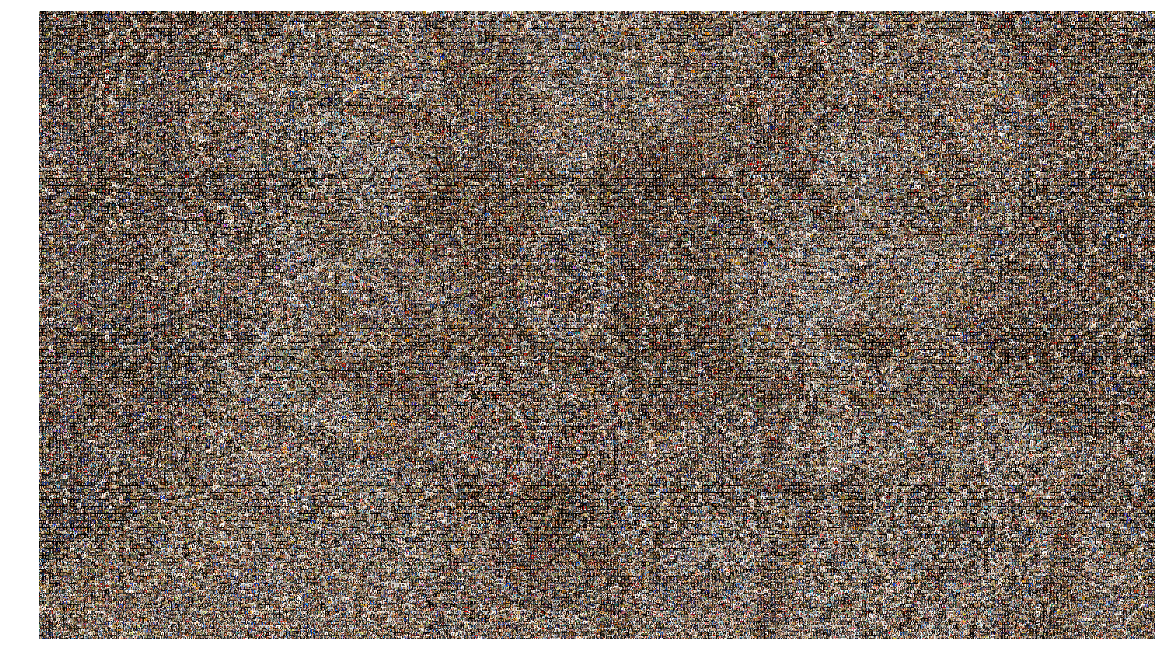

In [117]:
img_out = np.zeros((h*32, w*32, d), dtype=np.float64)

for y in range(h):
    for x in range(w):
        label = cluster_labels[y, x]

        b = bins[label]

        # select random from bucket
        img_patch = b[np.random.randint(len(b))]

        img_out[y*32:(y+1)*32, x*32:(x+1)*32] = cv2.resize(img_patch, (32, 32), interpolation = cv2.INTER_AREA) 
        
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(img_out)

img_out2 = cv2.cvtColor((img_out * 255).astype(np.uint8), cv2.COLOR_RGB2BGR)
_ = cv2.imwrite('result/%s_color.jpg' % os.path.splitext(os.path.basename(img_path))[0], img_out2)